# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats
from copy import copy
import time
import re
import yaml

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [2]:
#import functions from python files

#1) data import & filtering
from get_data import *
from get_data_yaml import *
from get_adjacent import *
from get_context import *

from filter_data1 import *
from filter_data2 import *
from filter_data3 import *
from filter_data4 import *
from filter_data5 import *

from select_data import *
from select_data_edge import *

from underscore_prefix import *
from underscore_suffix import *

from randomise_df import *


print("done")

done


# 2) My congestion algorithm

In [1]:
def get_data(address = "walmart_random"):
    """

    Parameters
    ----------
    address : STR
        Which collection to access in MongoDB. The default is "walmart_targeted".

    Returns
    -------
    df : Pandas DataFrame
        Data with no null or failed elements

    """
    #define my database and collection
    cluster = MongoClient("mongodb://127.0.0.1:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false")
    db = cluster["Rokos2021"]
    collection = db[address]
    
    #filter & store as pandas dataframe
    results = collection.find({"_meta.inserted_at": {"$gte": datetime(2021,2,20,9,0,0),
                                "$lte":datetime(2021,2,28,9,0,0)}, 
                                "origin": {"$ne": None}, 
                                "edge_id": {"$ne": None}, 
                                "target":{"$ne":None} 
                              })
    
    #convert to dataframe format
    df = pd.DataFrame(list(results))
    
    return df

In [33]:
#1) Import data from PyMongo
df = get_data(address = "blenheim_random")
df.head()


,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
0,603508789d41d33519785ce8,WayPoint7,WayPoint10,True,run,1970-01-01 01:00:26.596,WayPoint2,/robot_1/rapport_navigation,{'inserted_at': 2021-02-23 13:51:52.242000},False,WayPoint7_WayPoint10,move_base,1970-01-01 01:00:15.914,10.682,blenheim_warehouse,WayPoint10
1,60350878bf73e848c83ccaad,WayPoint9,WayPoint12,True,run,1970-01-01 01:00:26.622,WayPoint11,/robot_3/rapport_navigation,{'inserted_at': 2021-02-23 13:51:52.417000},False,WayPoint9_WayPoint12,move_base,1970-01-01 01:00:15.764,10.858,blenheim_warehouse,WayPoint12
2,6035087a1a3c54b8f478ce26,WayPoint8,WayPoint11,True,run,1970-01-01 01:00:26.944,WayPoint1,/robot_4/rapport_navigation,{'inserted_at': 2021-02-23 13:51:54.573000},False,WayPoint8_WayPoint11,move_base,1970-01-01 01:00:16.054,10.890,blenheim_warehouse,WayPoint11
3,60350891d60710a6dee9a7f8,WayPoint4,WayPoint7,True,run,1970-01-01 01:00:29.839,WayPoint8,/robot_0/rapport_navigation,{'inserted_at': 2021-02-23 13:52:17.787000},False,WayPoint4_WayPoint7,move_base,1970-01-01 01:00:15.517,14.322,blenheim_warehouse,WayPoint7
4,6035089453c9a5669b22ed00,WayPoint6,WayPoint9,True,run,1970-01-01 01:00:30.214,WayPoint2,/robot_2/rapport_navigation,{'inserted_at': 2021-02-23 13:52:20.094000},False,WayPoint6_WayPoint9,move_base,1970-01-01 01:00:15.633,14.581,blenheim_warehouse,WayPoint9


In [39]:
#order by run_id
df = df.sort_values("date_started", ascending = True)
df = df[df["agent"] =="/robot_3/rapport_navigation" ]
df.head(50)

,_id,origin,target,succeeded,run_id,date_finished,policy_goal,agent,_meta,is_final,edge_id,action,date_started,operation_time,topological_map,final_node
11386,6038937c8ea030df6a22fa05,WayPoint9,WayPoint12,True,2de9f39b-f6e0-4e02-a186-c12bc420ef97,1970-01-01 00:00:14.503,WayPoint8,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 06:21:48.726000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:03.693,10.810,blenheim_warehouse,WayPoint12
14495,6038f8a502ef654f159d29f5,WayPoint9,WayPoint12,True,ee749994-732b-4412-9f5e-fa4ed695e1a3,1970-01-01 00:00:14.945,WayPoint4,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 13:33:25.546000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:03.740,11.205,blenheim_warehouse,WayPoint12
8810,60383f231b475be8d70d5bf7,WayPoint9,WayPoint12,True,06276945-12df-4e9a-99d3-9d66f9452c28,1970-01-01 00:00:14.595,WayPoint2,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 00:21:55.970000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:03.979,10.616,blenheim_warehouse,WayPoint12
4097,6037a22646f51734415df7b7,WayPoint9,WayPoint12,True,3ddf6b20-0263-49ec-924f-6957e42a762b,1970-01-01 00:00:14.905,WayPoint1,/robot_3/rapport_navigation,{'inserted_at': 2021-02-25 13:12:06.422000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.202,10.703,blenheim_warehouse,WayPoint12
10345,603871b9523c175790b84622,WayPoint9,WayPoint12,True,7e171b08-480e-4e00-9acf-8c7771cbcf37,1970-01-01 00:00:14.609,WayPoint10,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 03:57:45.119000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.300,10.309,blenheim_warehouse,WayPoint12
14741,60390114290c3ec8378979fa,WayPoint9,WayPoint12,True,dd65c37b-f9f0-4364-b58e-8001e9599851,1970-01-01 00:00:14.518,WayPoint8,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 14:09:24.129000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.330,10.188,blenheim_warehouse,WayPoint12
5020,6037c3367fc6683fca2398a5,WayPoint9,WayPoint12,True,bae0c001-abec-4da7-8819-66624713d4f6,1970-01-01 00:00:14.706,WayPoint11,/robot_3/rapport_navigation,{'inserted_at': 2021-02-25 15:33:10.680000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.767,9.939,blenheim_warehouse,WayPoint12
622,60365c7c831cfa0d8be548ee,WayPoint9,WayPoint12,True,1f2c7fff-735a-4fab-9b10-12a02a5104eb,1970-01-01 00:00:16.016,WayPoint11,/robot_3/rapport_navigation,{'inserted_at': 2021-02-24 14:02:36.142000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.792,11.224,blenheim_warehouse,WayPoint12
12696,6038bda2d709b6de2babca6c,WayPoint9,WayPoint12,True,3b42e836-ff56-41d0-b588-dcdee50176f6,1970-01-01 00:00:14.981,WayPoint7,/robot_3/rapport_navigation,{'inserted_at': 2021-02-26 09:21:38.927000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:04.794,10.187,blenheim_warehouse,WayPoint12
7775,60381db4ebc0e945e9104c44,WayPoint9,WayPoint12,True,ad86f3f9-4d05-4082-a051-d10c570d0a93,1970-01-01 00:00:15.775,WayPoint1,/robot_3/rapport_navigation,{'inserted_at': 2021-02-25 21:59:16.881000},False,WayPoint9_WayPoint12,move_base,1970-01-01 00:00:05.040,10.735,blenheim_warehouse,WayPoint12


# 3) Processed with Scalar conext
- Blenheim_random
- Blenheim_targeted

## 3a) Blenheim random

In [10]:
blenheim_scalar_random_df = get_data_yaml(filename = "blenheim_random_success.yaml")
blenheim_scalar_random_df.head()

Time taken: 4.326541900634766 secs


,origin,target,edge_id,operation_time,n_robots
0,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.739,1
1,WayPoint10,WayPoint3,WayPoint10_WayPoint3,13.041,1
2,WayPoint10,WayPoint3,WayPoint10_WayPoint3,12.252,1
3,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.958,1
4,WayPoint10,WayPoint3,WayPoint10_WayPoint3,13.472,1


In [11]:
#blenheim_scalar_random_df = blenheim_scalar_random_df.sample(frac=1).reset_index(drop=True)
blenheim_scalar_random_df["n_robots"].value_counts()

1    6737
2    3755
3     830
4      87
5       3
Name: n_robots, dtype: int64

## 3b) Blenheim targeted

In [12]:
blenheim_scalar_targeted_df = get_data_yaml(filename = "blenheim_targeted_success.yaml")
blenheim_scalar_targeted_df.head()

Time taken: 4.377470016479492 secs


,origin,target,edge_id,operation_time,n_robots
0,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.971,1
1,WayPoint10,WayPoint3,WayPoint10_WayPoint3,12.302,1
2,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.034,1
3,WayPoint10,WayPoint3,WayPoint10_WayPoint3,12.465,1
4,WayPoint10,WayPoint3,WayPoint10_WayPoint3,12.029,1


In [13]:
#blenheim_scalar_targeted_df = blenheim_scalar_targeted_df.sample(frac=1).reset_index(drop=True)
blenheim_scalar_targeted_df["n_robots"].value_counts()

1    6258
2    4063
3    1094
4     129
5       6
Name: n_robots, dtype: int64

## 3c) Blenheim combined

In [14]:
blenheim_scalar_combined_df = pd.concat([blenheim_scalar_random_df,blenheim_scalar_targeted_df]).reset_index(drop = True)
blenheim_scalar_combined_df["n_robots"].value_counts()

1    12995
2     7818
3     1924
4      216
5        9
Name: n_robots, dtype: int64

In [49]:
df1 = blenheim_scalar_combined_df[ blenheim_scalar_combined_df["n_robots"] == 1]
print( "Mean:", df1["operation_time"].mean() )
print( "Std:", df1["operation_time"].std() )
print( "Min:", df1["operation_time"].min() )
print( "Max:", df1["operation_time"].max() )
print( "N_obs:", df1["operation_time"].count() )

Mean: 13.34343670642564
Std: 1.4887380474889382
Min: 9.939
Max: 24.363
Max: 12995


In [50]:
df2 = blenheim_scalar_combined_df[ blenheim_scalar_combined_df["n_robots"] == 2]
print( "Mean:", df2["operation_time"].mean() )
print( "Std:", df2["operation_time"].std() )
print( "Min:", df2["operation_time"].min() )
print( "Max:", df2["operation_time"].max() )
print( "N_obs:", df2["operation_time"].count() )

Mean: 15.05334638014841
Std: 2.3341061499540325
Min: 9.902
Max: 24.016
N_obs: 7818


In [51]:
df3 = blenheim_scalar_combined_df[ blenheim_scalar_combined_df["n_robots"] == 3]
print( "Mean:", df3["operation_time"].mean() )
print( "Std:", df3["operation_time"].std() )
print( "Min:", df3["operation_time"].min() )
print( "Max:", df3["operation_time"].max() )
print( "N_obs:", df3["operation_time"].count() )

Mean: 16.512857068607037
Std: 2.5435654145395064
Min: 10.452
Max: 23.614
N_obs: 1924


In [52]:
df4 = blenheim_scalar_combined_df[ blenheim_scalar_combined_df["n_robots"] == 4]
print( "Mean:", df4["operation_time"].mean() )
print( "Std:", df4["operation_time"].std() )
print( "Min:", df4["operation_time"].min() )
print( "Max:", df4["operation_time"].max() )
print( "N_obs:", df4["operation_time"].count() )

Mean: 17.332240740740737
Std: 2.4872839595154197
Min: 11.997
Max: 22.958
N_obs: 216


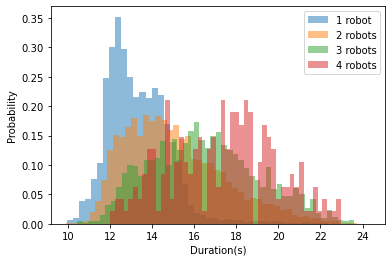

In [59]:
plt.hist(df1["operation_time"], density = True, bins = 50, alpha = 0.5);
plt.hist(df2["operation_time"], density = True, bins = 50, alpha = 0.5);
plt.hist(df3["operation_time"], density = True, bins = 50, alpha = 0.5);
plt.hist(df4["operation_time"], density = True, bins = 50, alpha = 0.5);
plt.xlabel("Duration(s)")
plt.ylabel("Probability")
plt.legend(["1 robot", "2 robots", "3 robots", "4 robots"])

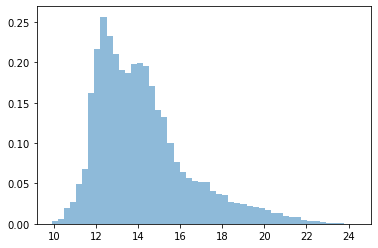

In [60]:
plt.hist(blenheim_scalar_combined_df["operation_time"], density = True, bins = 50, alpha = 0.5);

## 3d) Save data

In [15]:
#save to excel
blenheim_scalar_random_df.to_excel("blenheim_scalar_random.xlsx")
blenheim_scalar_targeted_df.to_excel("blenheim_scalar_targeted.xlsx")
blenheim_scalar_combined_df.to_excel("blenheim_scalar_combined.xlsx")
print("done")

done


In [25]:
#load from excel
blenheim_scalar_random_df = pd.read_excel("blenheim_scalar_random.xlsx")
blenheim_scalar_random_df = blenheim_scalar_random_df.loc[:,["origin", "target", "edge_id", "operation_time", "n_robots"]]
blenheim_scalar_random_df.head()

,origin,target,edge_id,operation_time,n_robots
0,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.739,1
1,WayPoint10,WayPoint3,WayPoint10_WayPoint3,13.041,1
2,WayPoint10,WayPoint3,WayPoint10_WayPoint3,12.252,1
3,WayPoint10,WayPoint3,WayPoint10_WayPoint3,11.958,1
4,WayPoint10,WayPoint3,WayPoint10_WayPoint3,13.472,1
